## Data Preprocessing

In [1]:
library(tidyverse)
library(car)
library(effectsize)
library(lsr)
library(afex)
library(dplyr)

data <- read.csv("data.csv")

head(data)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some


Loading required package: lme4

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVA

,Participant,X1...No.Music..Short.Task,X2...No.Music..Long.Task,X3...Music..Short.Task,X4...Music..Long.Task,WPM,Accuracy....,Time..s.
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,1,NA,NA,NA,46,98,30
2,1,NA,1,NA,NA,39,93,02:28
3,1,NA,NA,1,NA,43,97,35
4,1,NA,NA,NA,1,41,96,02:27
5,2,1,NA,NA,NA,64,93,21
6,2,NA,1,NA,NA,69,94,01:23


In [2]:
# Cleaned Column Names
colnames(data)[2:8] <- c(
    "No Music, Short Task",
    "No Music, Long Task",
    "Music, Short Task",
    "Music, Long Task", 
    "WPM", 
    "Accuracy", 
    "Time (s)"
)

# Converting all times to purely seconds
data$`Time (s)` <- sapply(data$`Time (s)`, function(x) {
  if (grepl(":", x)) {
    parts <- strsplit(x, ":")[[1]]
    mins <- as.numeric(parts[1])
    secs <- as.numeric(parts[2])
    return(mins * 60 + secs)
  } else {
    return(as.numeric(x))
  }
})

head(data)

,Participant,"No Music, Short Task","No Music, Long Task","Music, Short Task","Music, Long Task",WPM,Accuracy,Time (s)
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,1,NA,NA,NA,46,98,30
2,1,NA,1,NA,NA,39,93,148
3,1,NA,NA,1,NA,43,97,35
4,1,NA,NA,NA,1,41,96,147
5,2,1,NA,NA,NA,64,93,21
6,2,NA,1,NA,NA,69,94,83


In [3]:
data <- data %>%
  mutate(
    Music = rep(c("No Music", "No Music", "Music", "Music"), times = nrow(data)/4),
    TaskLength = rep(c("Short", "Long", "Short", "Long"), times = nrow(data)/4),
  )

head(data)

,Participant,"No Music, Short Task","No Music, Long Task","Music, Short Task","Music, Long Task",WPM,Accuracy,Time (s),Music,TaskLength
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1,1,1,NA,NA,NA,46,98,30,No Music,Short
2,1,NA,1,NA,NA,39,93,148,No Music,Long
3,1,NA,NA,1,NA,43,97,35,Music,Short
4,1,NA,NA,NA,1,41,96,147,Music,Long
5,2,1,NA,NA,NA,64,93,21,No Music,Short
6,2,NA,1,NA,NA,69,94,83,No Music,Long


In [4]:
# Convert to factors
data$Music <- factor(data$Music)
data$TaskLength <- factor(data$TaskLength)

In [5]:
table(data$Music, data$TaskLength) 

          
           Long Short
  Music      16    16
  No Music   16    16

## Exploratory Data Analyses

In [6]:
summary(data)   

  Participant    No Music, Short Task No Music, Long Task Music, Short Task
 Min.   : 1.00   Min.   :1            Min.   :1           Min.   :1        
 1st Qu.: 4.75   1st Qu.:1            1st Qu.:1           1st Qu.:1        
 Median : 8.50   Median :1            Median :1           Median :1        
 Mean   : 8.50   Mean   :1            Mean   :1           Mean   :1        
 3rd Qu.:12.25   3rd Qu.:1            3rd Qu.:1           3rd Qu.:1        
 Max.   :16.00   Max.   :1            Max.   :1           Max.   :1        
                 NA's   :48           NA's   :48          NA's   :48       
 Music, Long Task      WPM            Accuracy         Time (s)     
 Min.   :1        Min.   : 31.00   Min.   : 78.00   Min.   : 12.00  
 1st Qu.:1        1st Qu.: 61.50   1st Qu.: 89.00   1st Qu.: 17.00  
 Median :1        Median : 75.50   Median : 94.00   Median : 49.00  
 Mean   :1        Mean   : 76.41   Mean   : 92.78   Mean   : 52.44  
 3rd Qu.:1        3rd Qu.: 96.00   3rd Qu.: 97.

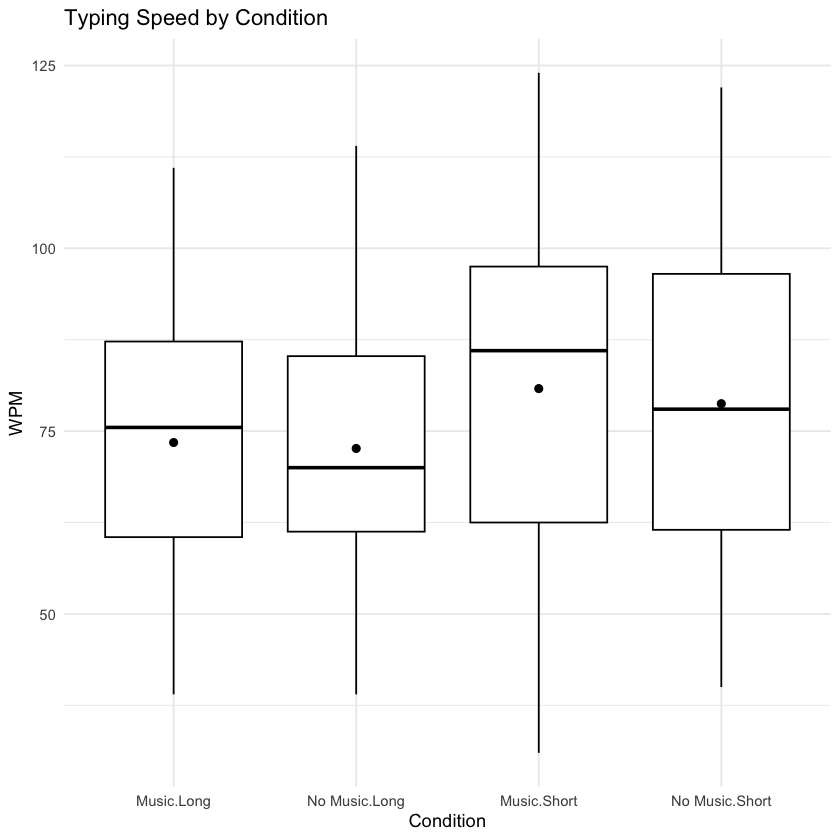

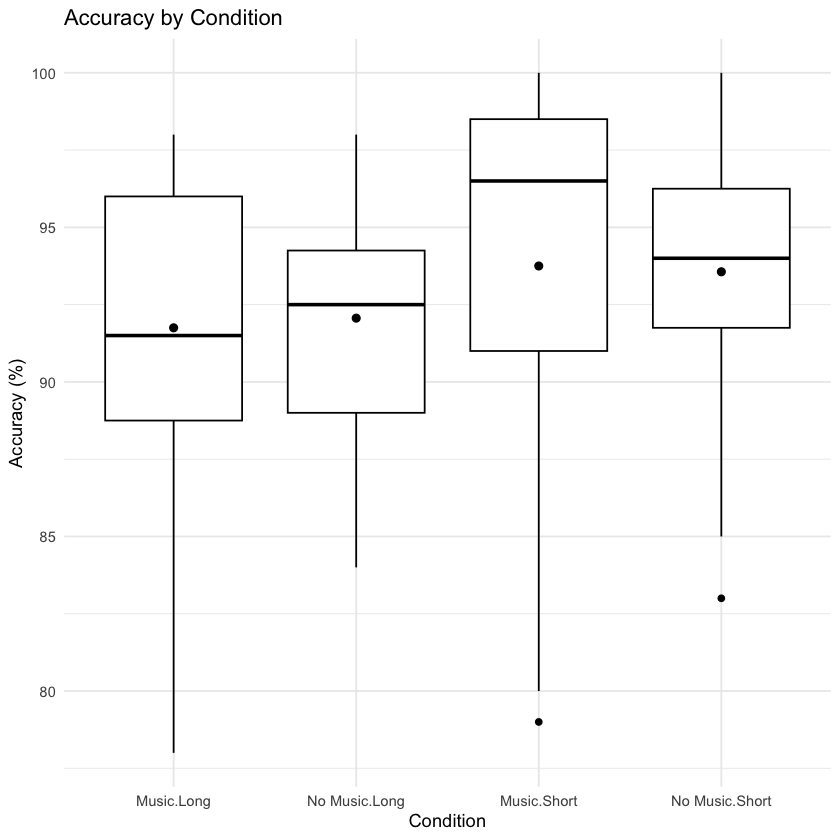

In [22]:
# WPM
ggplot(data, aes(x = interaction(Music, TaskLength), y = WPM)) +
  geom_boxplot(fill = "white", color = "black") +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 3, color = "black") +
  labs(x = "Condition", y = "WPM", title = "Typing Speed by Condition") +
  theme_minimal()

# Accuracy
ggplot(data, aes(x = interaction(Music, TaskLength), y = Accuracy)) +
  geom_boxplot(fill = "white", color = "black") +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 3, color = "black") +
  labs(x = "Condition", y = "Accuracy (%)", title = "Accuracy by Condition") +
  theme_minimal()

Warning message in geom_density(binwidth = 1, fill = "lightgreen"):
"Ignoring unknown parameters: `binwidth`"


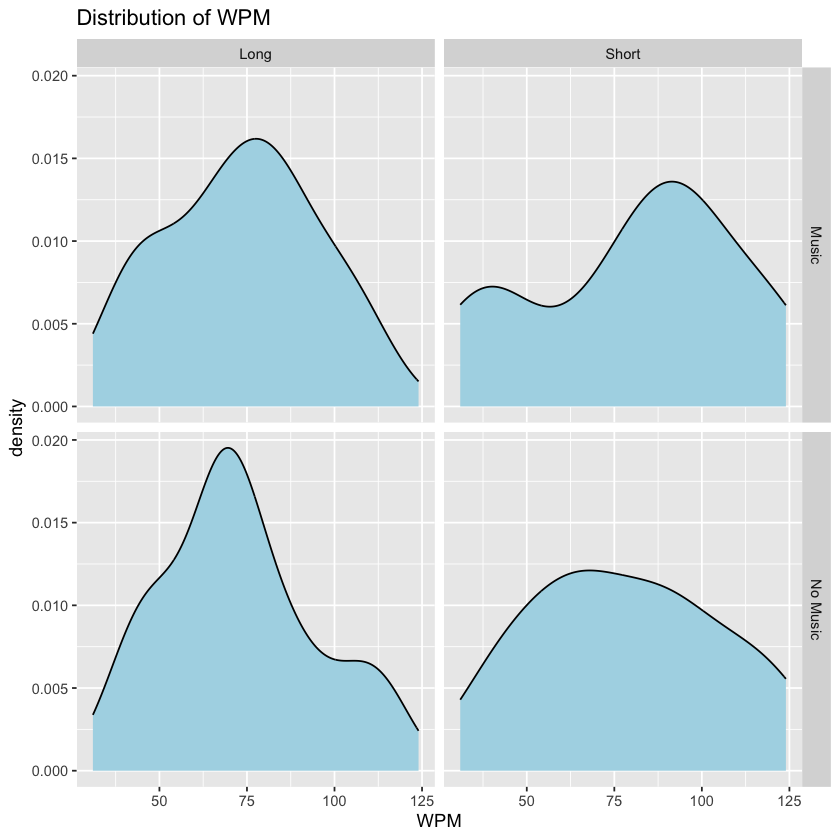

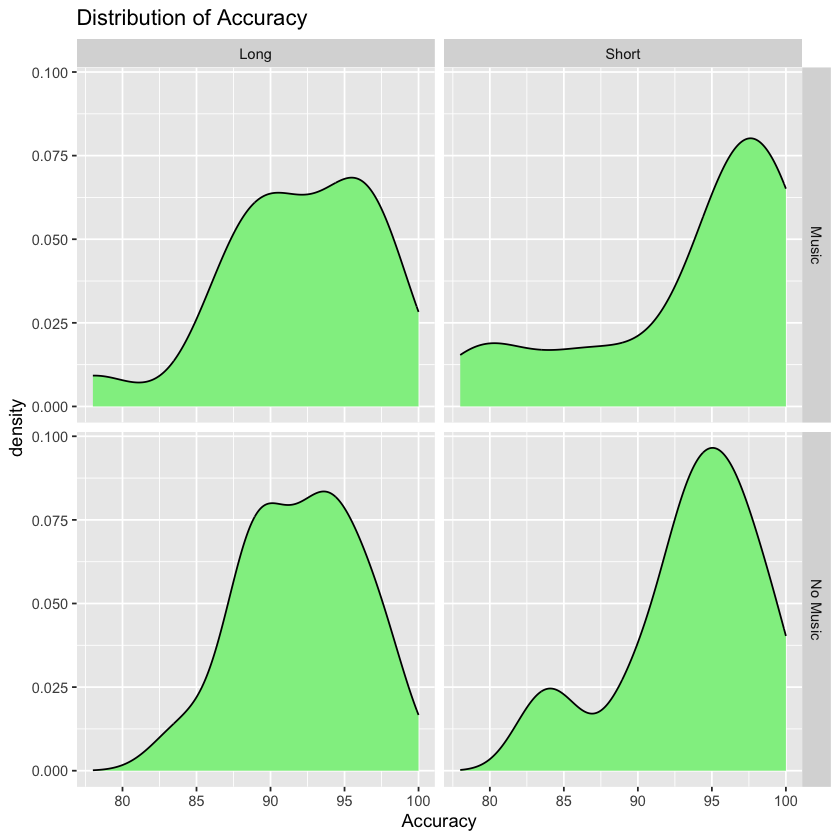

In [8]:
# To check the distribution shape of WPM and Accuracy

ggplot(data, aes(x = WPM)) +
  geom_density(fill = "lightblue") +
  facet_grid(Music ~ TaskLength) +
  labs(title = "Distribution of WPM")

ggplot(data, aes(x = Accuracy)) +
  geom_density(binwidth = 1, fill = "lightgreen") +
  facet_grid(Music ~ TaskLength) +
  labs(title = "Distribution of Accuracy")

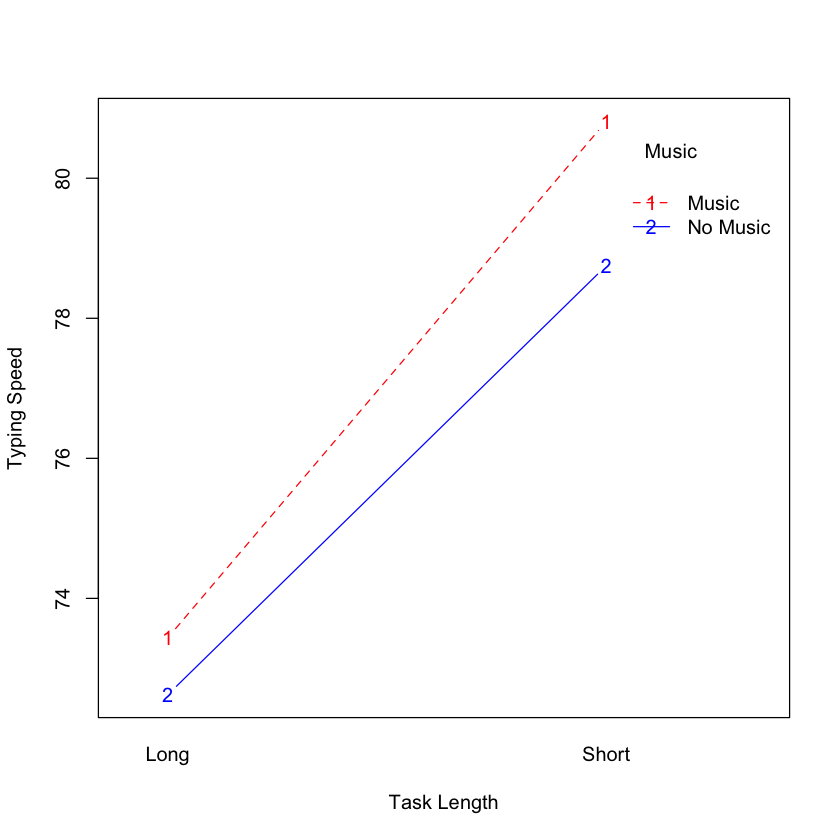

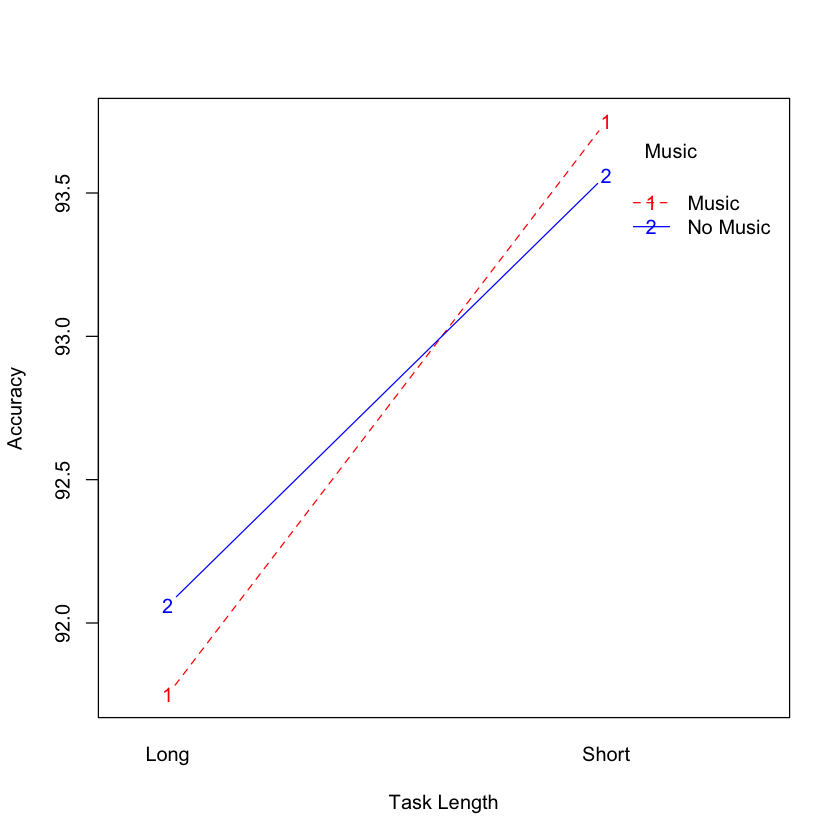

In [9]:
# To visually assess potential interactions between Music and TaskLength

interaction.plot(x.factor = data$TaskLength,
                 trace.factor = data$Music,
                 response = data$WPM,
                 fun = mean,
                 type = "b",
                 col = c("red", "blue"),
                 ylab = "Typing Speed",
                 xlab = "Task Length",
                 trace.label = "Music")

interaction.plot(x.factor = data$TaskLength,
                 trace.factor = data$Music,
                 response = data$Accuracy,
                 fun = mean,
                 type = "b",
                 col = c("red", "blue"),
                 ylab = "Accuracy",
                 xlab = "Task Length",
                 trace.label = "Music")

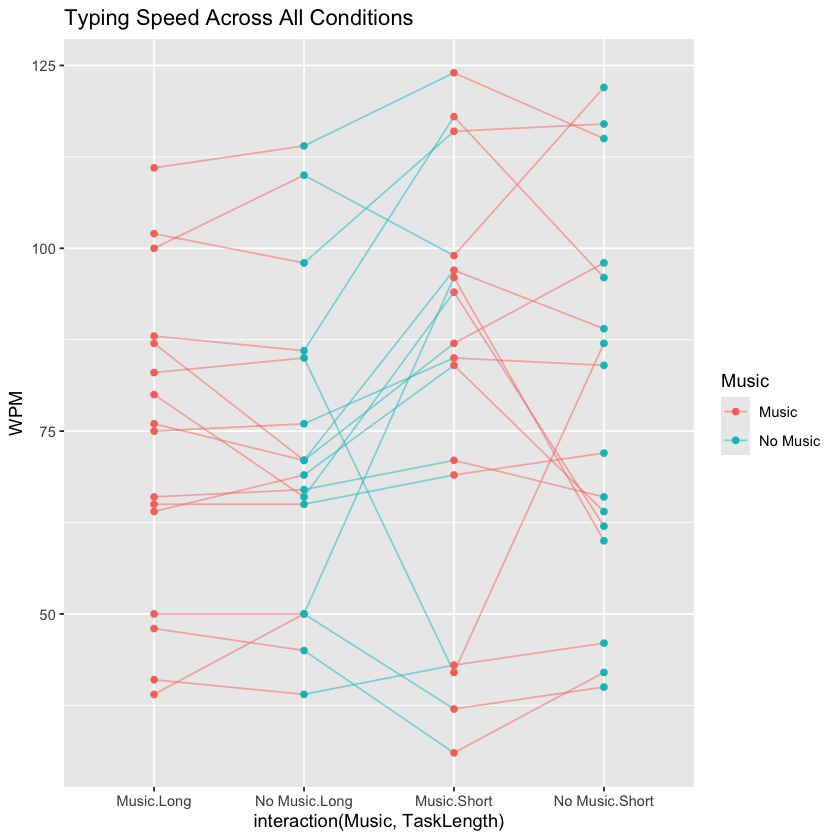

In [10]:
ggplot(data, aes(x = interaction(Music, TaskLength), y = WPM, group = Participant, color = Music)) +
  geom_line(alpha = 0.5) +
  geom_point() +
  labs(title = "Typing Speed Across All Conditions")

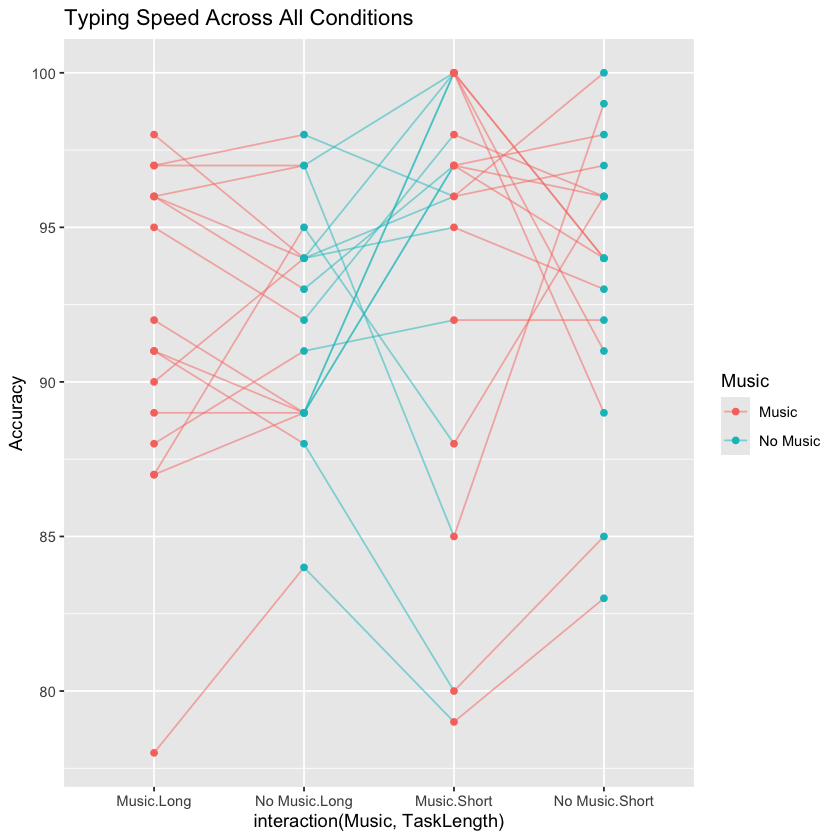

In [11]:
ggplot(data, aes(x = interaction(Music, TaskLength), y = Accuracy, group = Participant, color = Music)) +
  geom_line(alpha = 0.5) +
  geom_point() +
  labs(title = "Typing Speed Across All Conditions")

## Statistical Analyses

### WPM

#### Two-Way ANOVA

In [12]:
# Two-Way ANOVA for Typing Speed 
# aov(DependentVariable ~ Factor1 * Factor2, data = your_data) 
# Using repeated-measures ANOVA to account for repeated observations from the same participant

#model_speed <- aov(WPM ~ Music * TaskLength + Error(Participant/(Music * TaskLength)), data = data)
#summary(model_speed)

model_speed_afex <- aov_ez(
  id = "Participant",
  dv = "WPM",
  data = data,
  within = c("Music", "TaskLength")
)

summary(model_speed_afex)


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                 Sum Sq num Df Error SS den Df  F value    Pr(>F)    
(Intercept)      373627      1    32367     15 173.1520 1.214e-09 ***
Music                33      1     2080     15   0.2384   0.63244    
TaskLength          729      1     2096     15   5.2158   0.03737 *  
Music:TaskLength      6      1     1365     15   0.0687   0.79685    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

A two-way repeated-measures ANOVA revealed a significant main effect of Task Length on typing speed (F(1,15) = 5.22, p = 0.037), indicating that participants typed significantly slower on longer tasks. There were no significant effects of Music (F(1,15) = 0.24, p = 0.632) or the Music × Task Length interaction (F(1,15) = 0.07, p = 0.797).

While neither the main effect of music nor its interaction with task length reached statistical significance, we examine their practical importance through effect size analysis, following normality assumption testing.

#### Assumption Testing


	Shapiro-Wilk normality test

data:  res_speed
W = 0.97245, p-value = 0.1621


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.8567282,0.4685675
,60,NA,NA


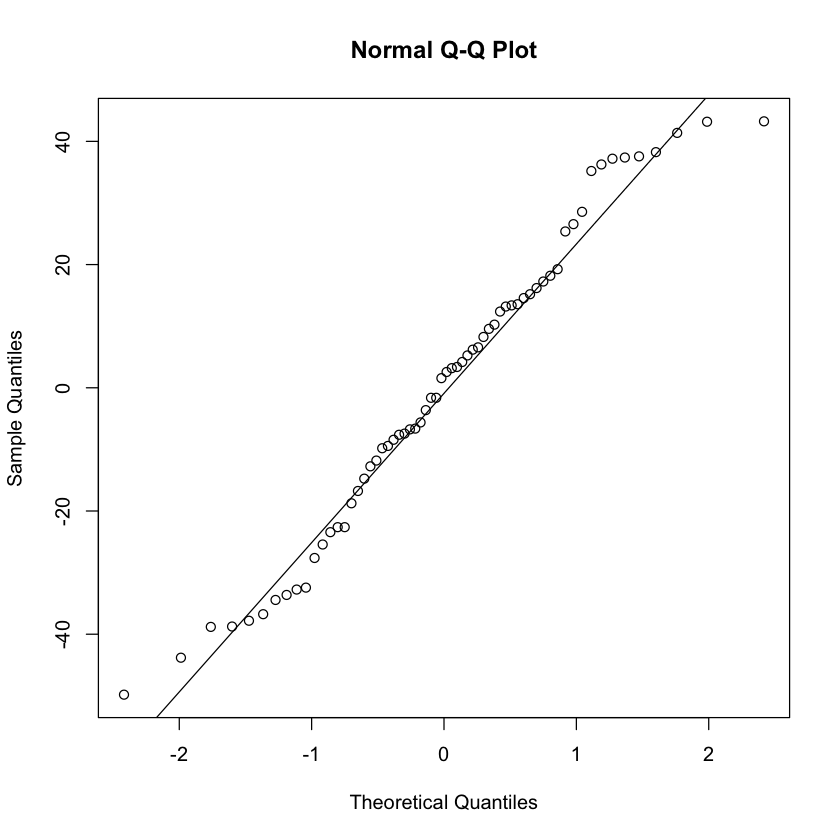

In [13]:
# Extract residuals from the linear model object
res_speed <- residuals(model_speed_afex$lm)

# Normality check
shapiro.test(res_speed)

# Q-Q plot
qqnorm(res_speed)
qqline(res_speed)

# Homogeneity of variance (rough check — not ideal for within-subjects)
leveneTest(WPM ~ interaction(Music, TaskLength), data = data)

Shapiro-Wilk test showed no significant deviation from normality (W = 0.972, p = 0.162), supporting the assumption of normality. The QQ plot provides visual justification for this claim.

Levene’s test for homogeneity of variance was also not significant (F(3,60) = 0.857, p = 0.469), indicating equal variances across conditions.

Therefore, all ANOVA assumptions were met.

#### Effect Size

In [14]:
eta_squared(model_speed_afex, partial = TRUE)

,Parameter,Eta2_partial,CI,CI_low,CI_high
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Music,0.015643482,0.95,0.00000000,1
3,TaskLength,0.258007432,0.95,0.00998492,1
2,Music:TaskLength,0.004557054,0.95,0.00000000,1


Although the effect of music and the interaction were not statistically significant, effect size analysis suggests that task length had a meaningful impact on typing speed.


### Accuracy

#### Two-Way Anova

In [15]:
#model_accuracy <- aov(Accuracy ~ Music * TaskLength + Error(Participant/(Music * TaskLength)),  data = data)
#summary(model_accuracy)

model_accuracy_afex <- aov_ez(
  id = "Participant",
  dv = "Accuracy",
  data = data,
  within = c("Music", "TaskLength")
)

summary(model_accuracy_afex)


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                 Sum Sq num Df Error SS den Df   F value Pr(>F)    
(Intercept)      550935      1  1068.44     15 7734.6835 <2e-16 ***
Music                 0      1   264.44     15    0.0035 0.9533    
TaskLength           49      1   248.50     15    2.9577 0.1060    
Music:TaskLength      1      1   135.50     15    0.1107 0.7440    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

A two-way repeated-measures ANOVA revealed no significant main effects of Music (F(1,15) = 0.0035, p = 0.953) or Task Length (F(1,15) = 2.96, p = 0.106), and no significant interaction between them (F(1,15) = 0.111, p = 0.744). This suggests that neither background music nor task length had a measurable impact on typing accuracy under the tested conditions.

While none reached statistical significance, we examine their practical importance through effect size analysis, following normality assumption testing.

#### Assumption Testing


	Shapiro-Wilk normality test

data:  res_accuracy
W = 0.90872, p-value = 0.0001734


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.6555671,0.582612
,60,NA,NA


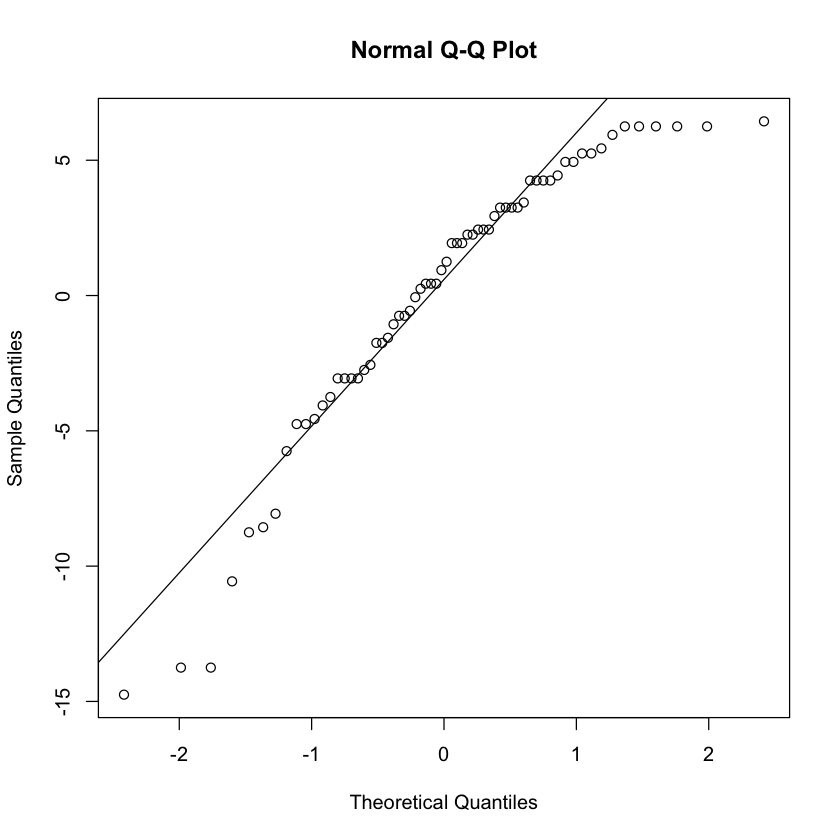

In [16]:
# Extract residuals from the linear model object
res_accuracy <- residuals(model_accuracy_afex$lm)

# Normality check
shapiro.test(res_accuracy)

# Q-Q plot
qqnorm(res_accuracy)
qqline(res_accuracy)

# Homogeneity of variance (rough check — not ideal for within-subjects)
leveneTest(Accuracy ~ interaction(Music, TaskLength), data = data)

The p-value is very small (p  = 0.001) which means that the residuals deviate significanlty from normality. QQ plot confirms. The normality assumption is violated.

Levene’s test showed no significant difference in variances across groups (F(3,60) = 0.656, p = 0.583), satisfying the homogeneity of variance assumption.

Our design is robust (e.g., 16 participants × 4 conditions = 64 rows), and the violation isn’t extreme, therefore we proceed with interpreting our ANOVA table, however we acknowledge the violation.

#### Effect Size

In [17]:
eta_squared(model_accuracy_afex, partial = TRUE)

,Parameter,Eta2_partial,CI,CI_low,CI_high
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Music,0.0002362949,0.95,0,1
3,TaskLength,0.1647058824,0.95,0,1
2,Music:TaskLength,0.0073260073,0.95,0,1


Task Length had a moderate effect on accuracy (η²ₚ = 0.165), despite not reaching significance while music and the interaction had negligible effect sizes (η²ₚ < 0.01)

Although statistical significance was not reached, the moderate effect size for task length suggests a possible practical impact on accuracy that may be worth exploring in future studies with larger samples.

## Beyond

### Correlation Test b/w WPM and Accuracy

In [18]:
cor.test(data$WPM, data$Accuracy)


	Pearson's product-moment correlation

data:  data$WPM and data$Accuracy
t = 5.7056, df = 62, p-value = 3.479e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3984203 0.7276266
sample estimates:
      cor 
0.5867645 


This indicates a significant positive correlation between WPM and Accuracy (p < 0.001). This means that participants who are more accurate type faster. This is because WPM is inherently tied to accuracy. You can't just slam your fingers on the keyboard quickly and expect to have a high WPM if you didn't coherently type any word.